In [1]:
import sys
sys.path.append('../')
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from taunet.simulation import * 
from taunet.cnn import TauNet

TauNet: Running on perlmutter


In [3]:
taus = np.round(np.arange(0.01,0.13,5e-4),4)
cmb = CMBmap(taus,nsim=240000,verbose=False)

In [4]:
taus = cmb.tau_dis

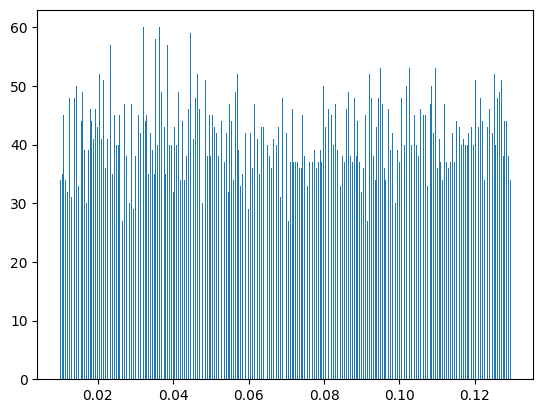

In [5]:
TAU = taus[:10000]
null = plt.hist(TAU, bins=500)

In [6]:
QU_S = []
for i in tqdm(range(10000)):
    QU_S.append(cmb.QU(i).T)         

100%|██████████| 10000/10000 [00:33<00:00, 300.26it/s]


In [7]:
QU_S = np.array(QU_S)

In [8]:
print(len(TAU),len(QU_S))

10000 10000


In [9]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(QU_S, TAU, test_size=0.1, random_state=42)

In [10]:
models = TauNet(nmaps=2)

2024-04-07 12:50:55.732969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 12:50:56.809007: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38218 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0


In [11]:
hists = models.compile_and_fit(Xs_train,ys_train,Xs_test,ys_test)

Epoch 1/45


2024-04-07 12:51:08.440885: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8302
2024-04-07 12:51:10.271933: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


282/282 [==============================] - 9s 5ms/step - loss: 0.0048 - mean_squared_error: 0.0038 - val_loss: 0.0075 - val_mean_squared_error: 0.0034 - lr: 0.0010
Epoch 2/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0033 - val_loss: 0.0014 - val_mean_squared_error: 0.0036 - lr: 0.0010
Epoch 3/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0032 - val_loss: 0.0037 - val_mean_squared_error: 0.0034 - lr: 0.0010
Epoch 4/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0032 - val_loss: 0.0014 - val_mean_squared_error: 0.0035 - lr: 0.0010
Epoch 5/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0032 - val_loss: 7.7785e-04 - val_mean_squared_error: 0.0034 - lr: 0.0010
Epoch 6/45
282/282 [==============================] - 1s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0032 - val_loss: 0.0017 - v

In [12]:
predicts = models.predict(Xs_test)

32/32 [==============================] - 0s 1ms/step


In [13]:
diffs = predicts[:,0] - ys_test.flatten()
stds = np.std(diffs)

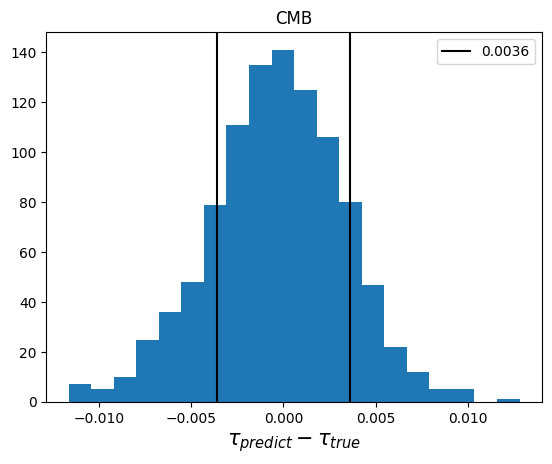

In [14]:
plt.hist(predicts[:,0] - ys_test.flatten(),bins=20)
plt.xlabel('$\\tau_{predict} - \\tau_{true}$',fontsize=15)
plt.axvline(stds,c='k',label=f'{stds:.4f}')
plt.axvline(-stds,c='k')
plt.title('CMB')
plt.legend()